# Stock Price Prediction
* Project Title: Tesla Stock Price Prediction using Historical Data
* Members Name :Vishal Panchal 

# 1. Introduction
Project Summary:
This project focuses on predicting Tesla's stock price using historical data, including Open, High, Low, Close, and Volume. By applying data analysis and machine learning models, we aim to forecast the stock’s closing price and provide insights for better investment decisions. The project includes data cleaning, exploratory data analysis, feature engineering, and building predictive models to achieve accurate predictions.).

# Problem Statement:
Stock price prediction is challenging due to the volatile and dynamic nature of the stock market. Investors and stakeholders need accurate tools to forecast future prices and make informed decisions amidst unpredictable market conditions.

# Business Objective:
The primary objective is to develop a predictive model to forecast Tesla’s stock closing prices, helping:

* Investors make better buy/sell decisions.
* Traders identify profitable opportunities.
* Businesses assess stock trends for planning and strategy.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

* We start by importing essential libraries.
* NumPy and Pandas for data manipulation.
* Matplotlib and Seaborn for visualizations.
* Scikit-learn and XGBoost for machine learning.

# 2. Load and View Data

In [4]:
df = pd.read_csv("C:\\Users\\Dell\\Downloads\\Tesla.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


This code imports the necessary library (Pandas) and loads the Tesla stock price data from a CSV file. The head() function displays the first few rows of the dataset, allowing you to verify that the data has been loaded correctly.

In [5]:
#Shape gives the dimensions of the dataset.
df.shape

(1692, 7)

In [6]:
#Describe provides summary statistics for numerical columns.
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [11]:
#Info tells us data types and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


# 4. Initial Visualization

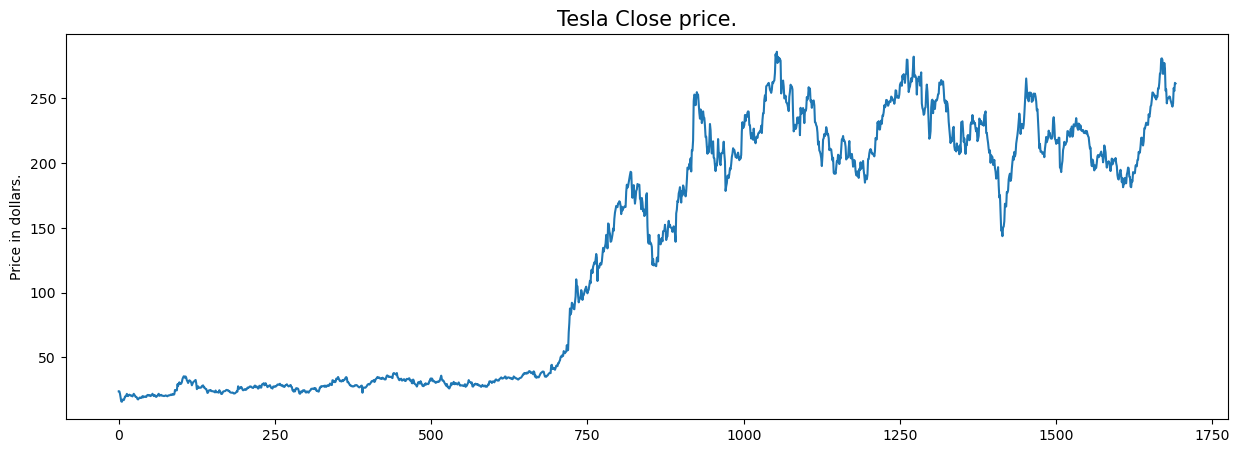

In [13]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

# A line plot of closing prices shows Tesla's performance over time, highlighting trends and volatility

1) X-axis (Index): Represents time, where each data point corresponds to a specific trading day.
2) Y-axis (Price in dollars): Shows Tesla's closing stock price on each trading day.
3) Trend:
       The price starts low and remains relatively stable for a while.
       Around the middle, there is a significant upward trend, showing a rapid increase in Tesla’s stock price.
       After peaking, the price fluctuates with noticeable highs and lows, indicating volatility.
4) Insights:
       The sharp rise suggests a period of rapid growth, likely driven by major company achievements or market demand.
       The later fluctuations highlight market dynamics and investor reactions.

In [72]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [17]:
df[df['Close'] == df['Adj Close']].shape

(1692, 7)

# The first line checks for any missing values in the dataset. The second line removes the 'Adj Close' column, which may not be necessary for the analysis, simplifying the dataset.

In [19]:
# Check for missing values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [78]:
# Drop the 'Adj Close' column
df = df.drop(['Adj Close'], axis=1)

# 6. Feature Distribution

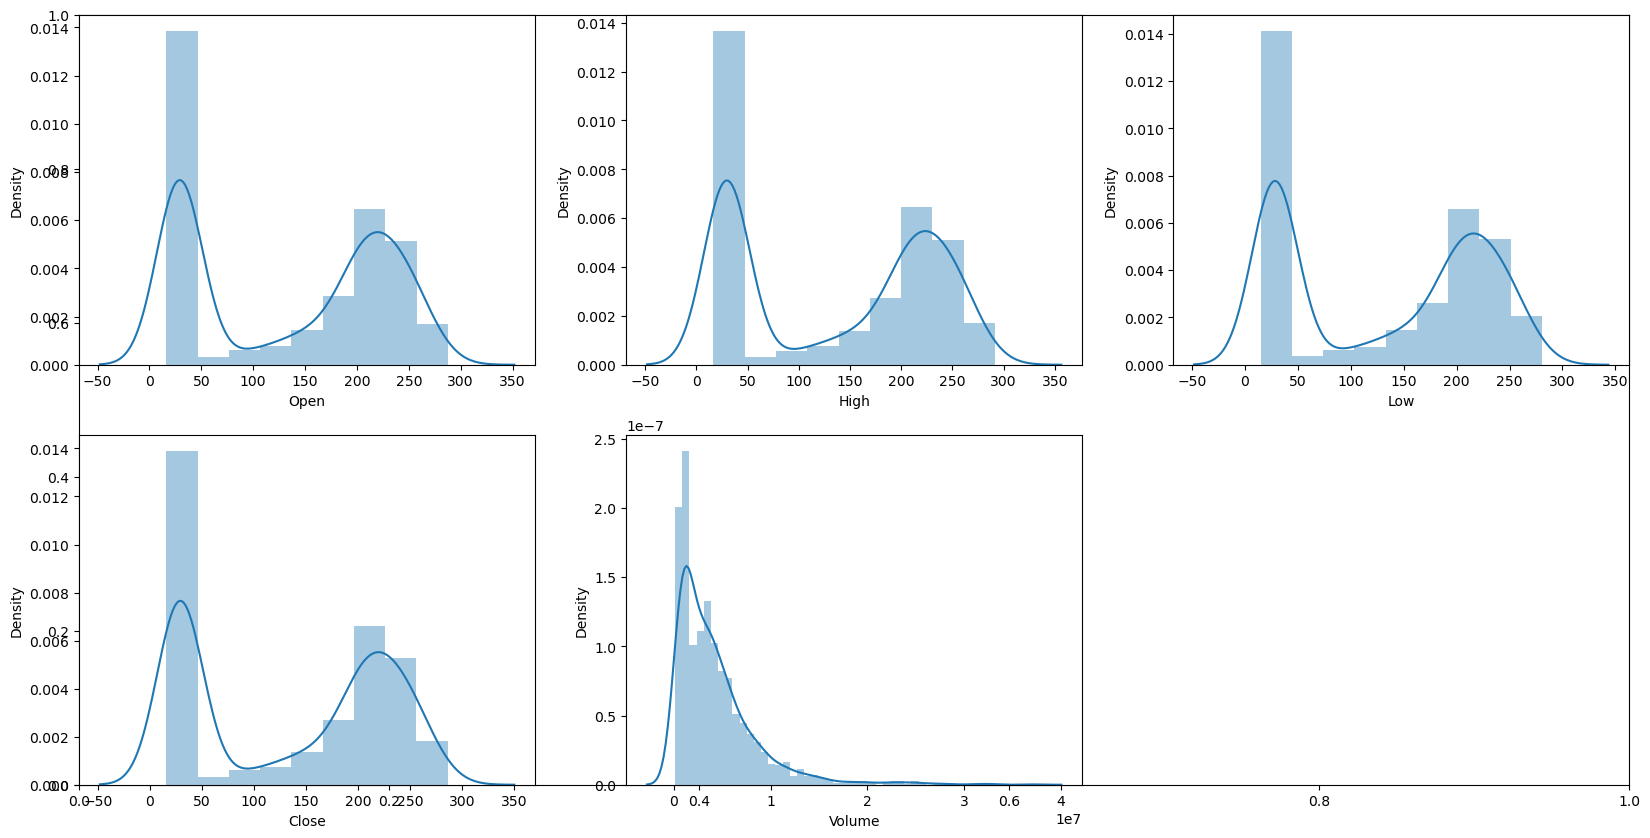

In [21]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

# Histograms with KDE curves show feature distributions, helping us identify skewness or irregularities.
1) The plots show how Tesla’s stock features (Open, High, Low, Close, and Volume) are distributed.

2) Open, High, Low, Close: Two peaks indicate typical stock prices (200–300) and possible errors or missing values near zero.

3) Volume: Skewed distribution shows most trading days have low activity, but some days see very high volume.

4) The sharp peak near zero in price-related features may need investigation for data quality issues.

5) Skewness in Volume suggests transformations (e.g., log) might improve model performance.

# 7 Outlier Detection

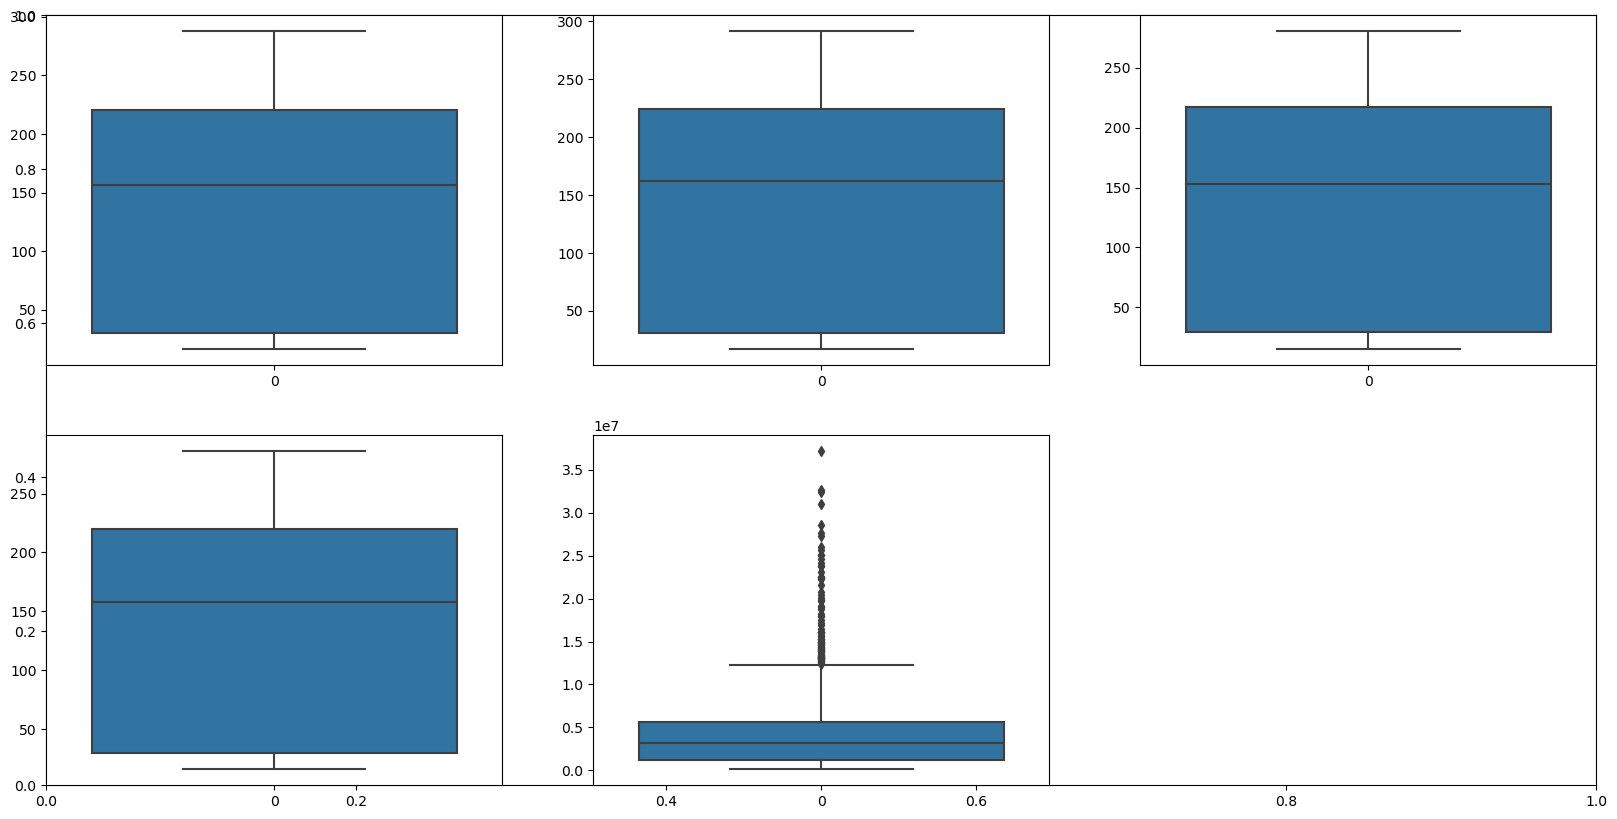

In [23]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

# Boxplots reveal outliers, which are extreme values that may distort our predictions

In [25]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010


In [27]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,day,month,year,is_quarter_end
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,6,7,2010,0


# 9. Grouped Analysis

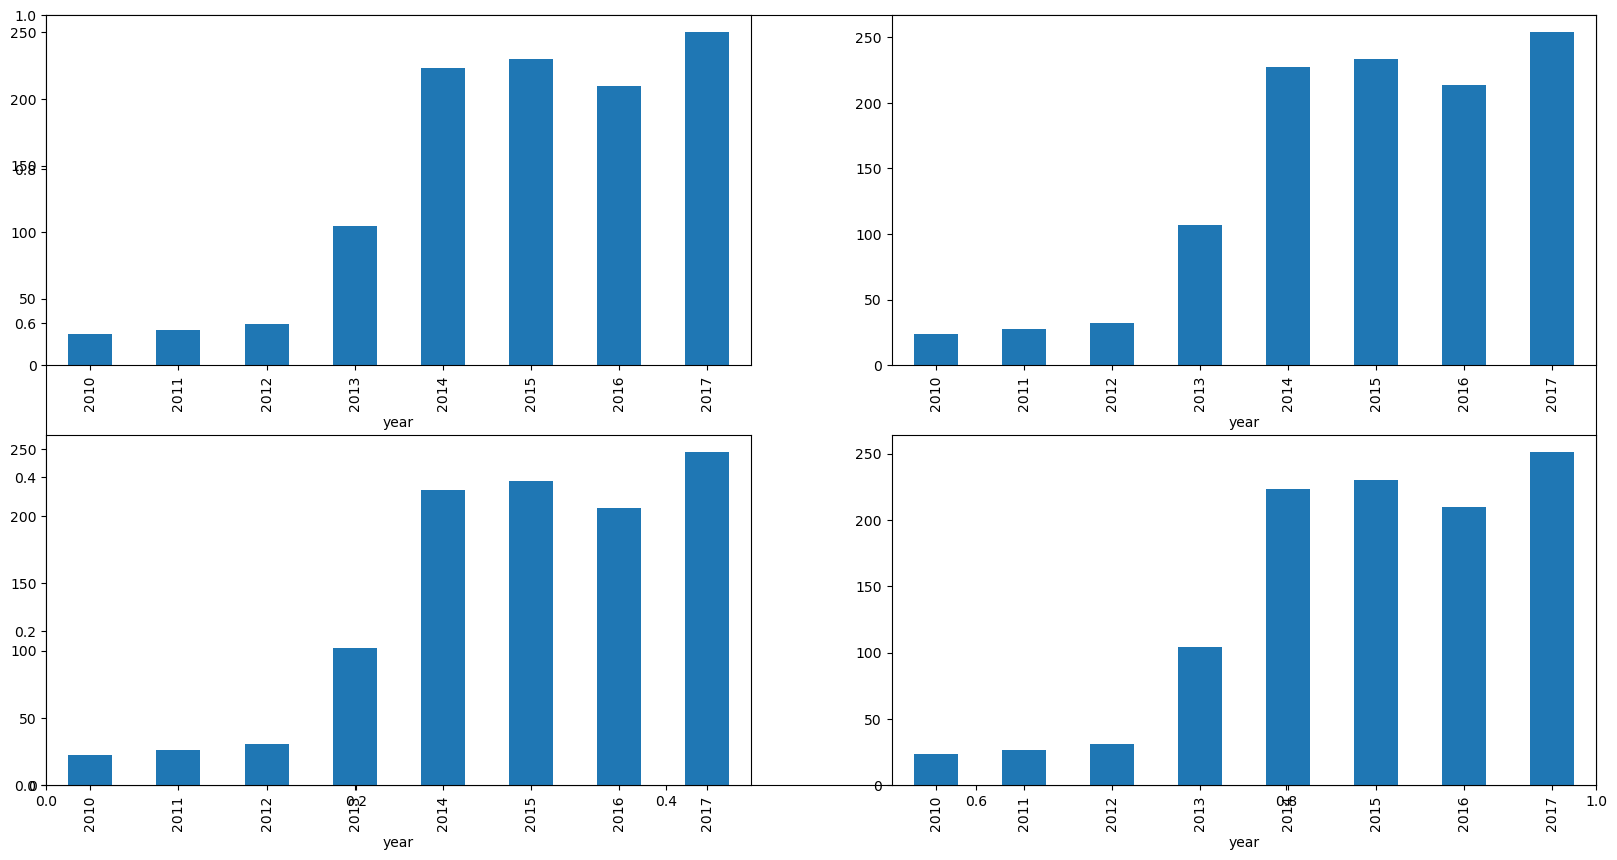

In [29]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

# Aggregating by year helps us understand long-term trends in stock prices.

In [31]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Adj Close,day,month,year
is_quarter_end,,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,130.797709,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,135.673269,15.657244,7.584806,2013.314488


# 10. Create Predictive Features

In [33]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

# We engineered features to capture daily price changes and set a binary target for price movement prediction.

# 11. Target Distribution

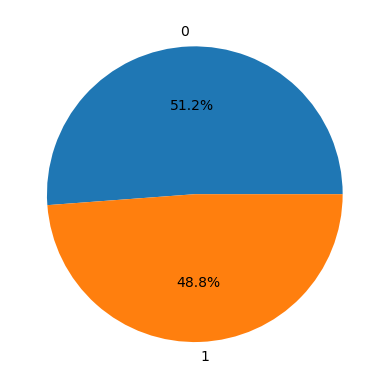

In [35]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

# A pie chart shows the balance between classes, helping us assess the need for balancing techniques

# 12. Correlation Analysis

ValueError: could not convert string to float: '6/29/2010'

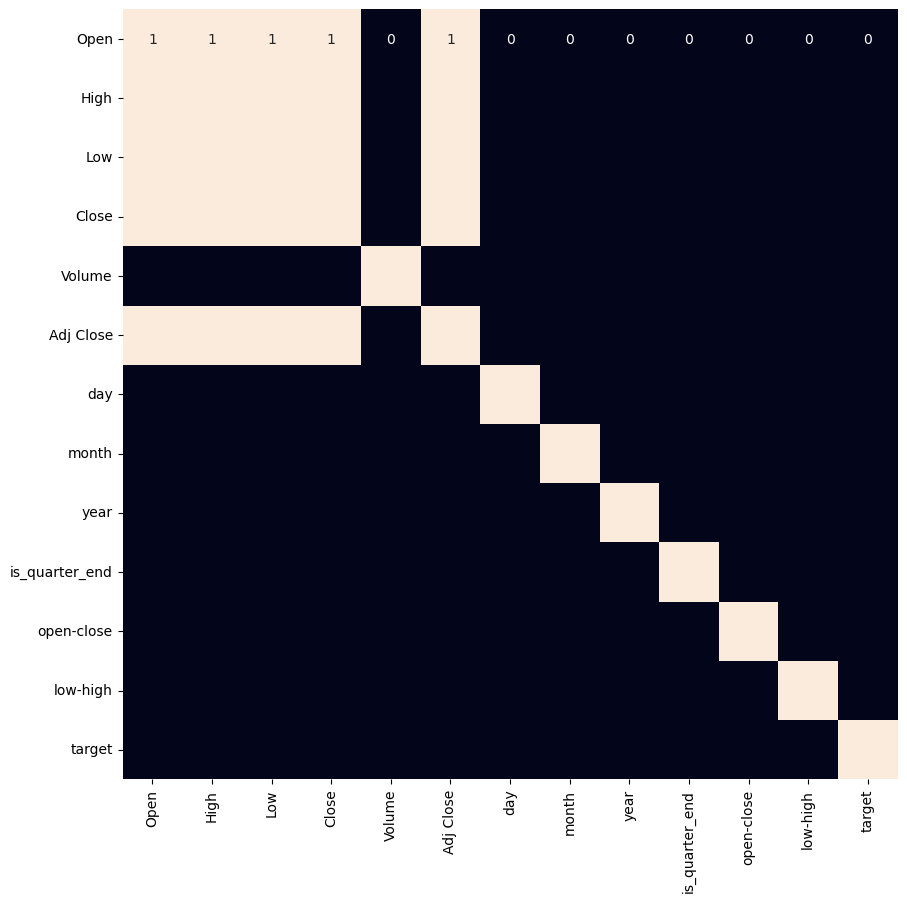

In [39]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
corr=df.corr()
plt.show()

# A heatmap visualizes relationships between features. Strong correlations may indicate redundant features.

# 13. Data Preparation

In [98]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(1522, 3) (170, 3)


# We selected features, standardized them, and split the dataset into training and validation sets

# 14. Model Training

In [119]:
# Initialize models
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train models
for i in range(3):
    models[i].fit(X_train, Y_train)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:, 1]))
    print()


LogisticRegression() : 
Training Accuracy :  0.5191709844559586
Validation Accuracy :  0.5435330347144457

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4746908462867012
Validation Accuracy :  0.4473684210526316

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

# We trained multiple models and compared their validation accuracies
1) Logistic Regression and SVC are underperforming due to either underfitting or a lack of complexity.
2) XGBoost shows better predictive performance but risks overfitting the training data.
To improve performance, consider:
* Tuning hyperparameters for all models.
* Using feature selection or engineering to improve the dataset.
* Adding regularization for XGBoost to reduce overfitting.
* Exploring additional models or ensembles for better generalization.

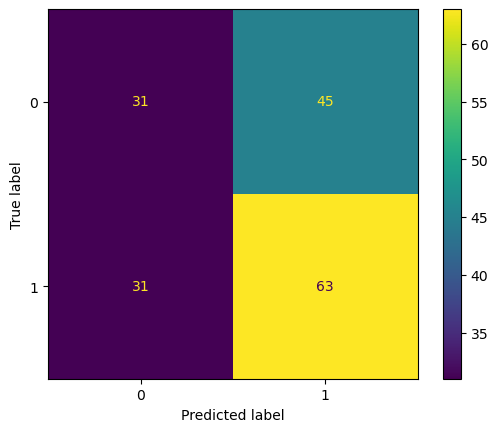

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

# Confusion Matrix
1) A confusion matrix is a table used to evaluate the performance of a classification model.
2) It shows the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class.